In [ ]:
import pandas as pd
import numpy as np
import math 

In [ ]:
col_names = ['id','title', 'without_stopwords','date','source', 'numPunct','numWords','isCap', 'label',]
news = pd.read_csv('full-dataset.csv', header=None, names=col_names)

In [ ]:
news.head()

,id,title,without_stopwords,date,source,numPunct,numWords,isCap,label
0,NaN,title,without_stopwords,date,source,numPunct,numWords,isCap,class
1,0.0,Proof The Mainstream Media Is Manipulating The...,proof mainstream media manipulating election t...,9/19/2016,Buzzfeed,0,9,True,Fake
2,1.0,Trump Latest Campaign Promise May Be His Most ...,trump latest campaign promise may horrible one...,9/19/2016,Buzzfeed,0,8,True,Fake
3,2.0,Obama Pushes One World Government,obama pushes one world government,9/20/2016,Buzzfeed,0,5,True,Fake
4,3.0,WHOA! NEW DISTURBING VIDEO Shows HILLARY'S Cam...,whoa! new disturbing video shows hillary's cam...,9/19/2016,Buzzfeed,4,14,False,Fake


In [ ]:
# news.drop('id', axis=1, inplace=True)

In [ ]:
# news = news.drop(['id'],axis=1)
news = news.dropna()
news.head()

,id,title,without_stopwords,date,source,numPunct,numWords,isCap,label
1,0.0,Proof The Mainstream Media Is Manipulating The...,proof mainstream media manipulating election t...,9/19/2016,Buzzfeed,0,9,True,Fake
2,1.0,Trump Latest Campaign Promise May Be His Most ...,trump latest campaign promise may horrible one...,9/19/2016,Buzzfeed,0,8,True,Fake
3,2.0,Obama Pushes One World Government,obama pushes one world government,9/20/2016,Buzzfeed,0,5,True,Fake
4,3.0,WHOA! NEW DISTURBING VIDEO Shows HILLARY'S Cam...,whoa! new disturbing video shows hillary's cam...,9/19/2016,Buzzfeed,4,14,False,Fake
5,4.0,Is it the Beginning of the End for Hillary Cli...,beginning end hillary clinton? ‚eagle rising,9/21/2016,Buzzfeed,1,6,False,Fake


In [ ]:
news = news.drop(['id'],axis=1)
news.head()

,title,without_stopwords,date,source,numPunct,numWords,isCap,label
1,Proof The Mainstream Media Is Manipulating The...,proof mainstream media manipulating election t...,9/19/2016,Buzzfeed,0,9,True,Fake
2,Trump Latest Campaign Promise May Be His Most ...,trump latest campaign promise may horrible one...,9/19/2016,Buzzfeed,0,8,True,Fake
3,Obama Pushes One World Government,obama pushes one world government,9/20/2016,Buzzfeed,0,5,True,Fake
4,WHOA! NEW DISTURBING VIDEO Shows HILLARY'S Cam...,whoa! new disturbing video shows hillary's cam...,9/19/2016,Buzzfeed,4,14,False,Fake
5,Is it the Beginning of the End for Hillary Cli...,beginning end hillary clinton? ‚eagle rising,9/21/2016,Buzzfeed,1,6,False,Fake


In [ ]:
news = news[0 :1000]

In [ ]:
# : get everything , :-1 excludes the last column
x = news.iloc[:,:-1].values
y = news.iloc[:,-1].values

In [ ]:
x[0]

array(['Proof The Mainstream Media Is Manipulating The Election By Taking Bill Clinton Out Of Context',
       'proof mainstream media manipulating election taking bill clinton context',
       '9/19/2016', 'Buzzfeed', '0', '9', 'True'], dtype=object)

In [ ]:
y[0]

'Fake'

In [ ]:
# Convert text data to numerical values
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
mat_title = cv.fit_transform(x[:,0]).todense()
# 0 is the column you are extracting data from

In [ ]:
mat_title

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0]])

In [ ]:
#Divide training and testing dataset
# x-train - trainig set of all the independent variables in x 
# x-test - testing set of all the independent variables in x
# y-train - trainig set of all the independent variables in y 
# y-test - testing set of all the independent variables in y
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (mat_title,y, test_size=0.45, random_state=0)
#set the test_size to .2 =  20% which means that 20% of the records would be in the test set. The rest will be in the training set

### <font color='blue'>**CROSS VALIDATION**</font>


In [ ]:
# https://stackabuse.com/classification-in-python-with-scikit-learn-and-pandas/
# fit the model on one set of data
# model.fit(x_train, y_train)

# evaluate the model on the second set of data
# y2_model = model.predict(x_test)

In [ ]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits=10, random_state=None) 
count = 1 
for train_index, test_index in kf.split(mat_title):
      print("\n ------------ Fold: ", count)
      print("Train:", train_index, "\n Validation:",test_index)
      x_train, x_test = x[train_index], x[test_index] 
      y_train, y_test = y[train_index], y[test_index]
      count = count + 1


 ------------ Fold:  1
Train: [ 272  273  274 ... 2716 2717 2718] 
 Validation: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 22

In [ ]:
print("\n Training set:", x_train, y_train)
print("\n Testing set :", x_test, y_test)


 Training set: [['Proof The Mainstream Media Is Manipulating The Election By Taking Bill Clinton Out Of Context'
  'proof mainstream media manipulating election taking bill clinton context'
  '9/19/2016' ... '0' '9' 'True']
 ['Trump Latest Campaign Promise May Be His Most Horrible One Yet'
  'trump latest campaign promise may horrible one yet' '9/19/2016' ...
  '0' '8' 'True']
 ['Obama Pushes One World Government' 'obama pushes one world government'
  '9/20/2016' ... '0' '5' 'True']
 ...
 ['Sinovac€™s vaccine doses arrive in Davao, Cebu'
  'sinovac€™s vaccine doses arrive davao, cebu' '3/2/2021' ... '1' '6'
  'False']
 ['Local chief execs move up in COVID-19 vaccine priority list'
  'local chief execs move covid-19 vaccine priority list' '3/20/2021' ...
  '1' '8' 'False']
 ['COVID-19 vaccination law IRR not yet finalized€“ DOH'
  'covid-19 vaccination law irr yet finalized€“ doh' '3/21/2021' ... '1'
  '8' 'False']] ['Fake' 'Fake' 'Fake' ... 'Real' 'Real' 'Real']

 Testing set : [['Con

In [ ]:
# Dont mind this part sa
# import matplotlib.pyplot as plt
# from matplotlib.patches import Patch

In [ ]:
# np.random.seed(1338)

In [ ]:
# from sklearn.model_selection import KFold
# kf = KFold(n_splits=10)
# kf.get_n_splits(x)
# print(kf)

# KFold(n_splits=2, random_state=None, shuffle=False)
# for train_index, test_index in kf.split(x):
#   print("TRAIN:", train_index, "TEST:", test_index)
#   x_train, x_test = x[train_index], x[test_index]
#   y_train, y_test = y[train_index], y[test_index]


In [ ]:
# from sklearn.model_selection import StratifiedKFold
# skf = StratifiedKFold(n_splits=10, random_state=None)
# # X is the feature set and y is the target
# for train_index, val_index in skf.split(x,y): 
#     print("Train:", train_index, "Validation:", val_index) 
#     x_train, x_test = x[train_index], x[val_index] 
#     y_train, y_test = y[train_index], y[val_index]

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, mat_title, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (mean(scores) * 100, std(scores)*100))

Accuracy: 86.036 (1.926)


### <font color='blue'>**LOGISTIC REGRESSION**</font>


In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression().fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
print("Training set score: {:.0f}%".format(log_reg.score(x_train,y_train)*100))
print("Test set score: {:.0f}%".format(log_reg.score(x_test,y_test)*100))

Training set score: 99%
Test set score: 83%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
logR_pred = log_reg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef

In [ ]:
print("-------LOGISTIC REGRESSION------")
print("Logistic Regression accuracy:", metrics.accuracy_score(y_test, logR_pred)*100)
print("Logistic Regression fscore:", metrics.f1_score(y_test, logR_pred,average='weighted')*100)
print("Logistic Regression precision:", metrics.precision_score(y_test, logR_pred,average='weighted')*100)
print("Logistic Regression recall:", metrics.recall_score(y_test, logR_pred,average='weighted')*100)
print("Logistic Regression ROC_AOC:", roc_auc_score(y, log_reg.predict_proba(mat_title)[:, 1]) * 100)
print("Logistic Regression MCC:", matthews_corrcoef(y_test, logR_pred)*100)

-------LOGISTIC REGRESSION------
Logistic Regression accuracy: 83.49673202614379
Logistic Regression fscore: 82.53867502306397
Logistic Regression precision: 82.37196180555556
Logistic Regression recall: 83.49673202614379
Logistic Regression ROC_AOC: 95.98631429919774
Logistic Regression MCC: 48.131413359768786


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


### <font color='blue'>**NAIVE BAYES**</font>


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
nb_reg = GaussianNB().fit(x_train,y_train)
# gnb.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
nb_pred = nb_reg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
print("Training set score: {:.0f}%".format(nb_reg.score(x_train,y_train)*100))
print("Test set score: {:.0f}%".format(nb_reg.score(x_test,y_test)*100))

Training set score: 100%
Test set score: 64%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
print("-------NAIVE BAYES------")
print("Gaussian Naive Bayes model accuracy:", metrics.accuracy_score(y_test, nb_pred)*100)
print("Gaussian Naive Bayes model fscore:", metrics.f1_score(y_test, nb_pred,average='weighted')*100)
print("Gaussian Naive Bayes model precision:", metrics.precision_score(y_test, nb_pred,average='weighted')*100)
print("Gaussian Naive Bayes model recall:", metrics.recall_score(y_test, nb_pred,average='weighted')*100)
print("Gaussian Naive Bayes model ROC_AOC:", roc_auc_score(y, nb_reg.predict_proba(mat_title)[:, 1]) * 100)
print("Gaussian Naive Bayes model MCC:", matthews_corrcoef(y_test, nb_pred)*100)

-------NAIVE BAYES------
Gaussian Naive Bayes model accuracy: 63.77777777777778
Gaussian Naive Bayes model fscore: 64.0242735708433
Gaussian Naive Bayes model precision: 64.79677113010447
Gaussian Naive Bayes model recall: 63.77777777777778
Gaussian Naive Bayes model ROC_AOC: 83.70053039575684
Gaussian Naive Bayes model MCC: 27.293599769470887


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


### <font color='blue'>**DECISION TREE**</font>


In [ ]:
# https://www.datacamp.com/community/tutorials/decision-tree-classification-python
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import tree

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)
#Predict the response for test dataset
dec_pred = clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
print("-------DECISION TREE------")
print("Decision Tree accuracy:", metrics.accuracy_score(y_test, dec_pred)*100)
print("Decision Tree fscore:", metrics.f1_score(y_test, dec_pred,average='weighted')*100)
print("Decision Tree precision:", metrics.precision_score(y_test, dec_pred,average='weighted')*100)
print("Decision Tree recall:", metrics.recall_score(y_test, dec_pred,average='weighted')*100)
print("Decision Tree ROC_AUC:", roc_auc_score(y, clf.predict_proba(mat_title)[:, 1]) * 100)
print("Decision Tree MCC:", matthews_corrcoef(y_test, dec_pred)*100)

-------DECISION TREE------
Decision Tree accuracy: 65.77777777777779
Decision Tree fscore: 65.14209401709402
Decision Tree precision: 73.12708787218591
Decision Tree recall: 65.77777777777779
Decision Tree ROC_AUC: 68.61893104855162
Decision Tree MCC: 39.5798716182891


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[Text(167.4, 190.26, 'X[4689] <= 0.5\nentropy = 0.759\nsamples = 1495\nvalue = [328, 1167]'),
 Text(83.7, 135.9, 'X[4692] <= 0.5\nentropy = 0.856\nsamples = 1112\nvalue = [312, 800]'),
 Text(41.85, 81.53999999999999, 'X[3713] <= 0.5\nentropy = 0.915\nsamples = 939\nvalue = [310, 629]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.839\nsamples = 761\nvalue = [204, 557]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.974\nsamples = 178\nvalue = [106, 72]'),
 Text(125.55000000000001, 81.53999999999999, 'X[3499] <= 0.5\nentropy = 0.091\nsamples = 173\nvalue = [2, 171]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.052\nsamples = 172\nvalue = [1, 171]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(251.10000000000002, 135.9, 'X[3885] <= 0.5\nentropy = 0.25\nsamples = 383\nvalue = [16, 367]'),
 Text(209.25, 81.53999999999999, 'X[4372] <= 2.5\nentropy = 0.216\nsamples = 379\nvalue = [13, 366]'),
 Text(188.32500000000002, 27.18000

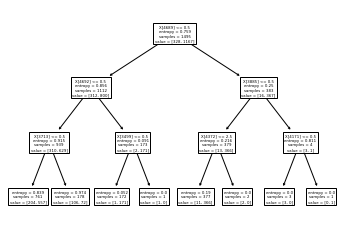

In [ ]:
tree.plot_tree(clf)

In [ ]:
pip install graphviz

### <font color='blue'>**CONFUSION MATRIX**</font>


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, dec_pred)

array([[ 94, 178],
       [ 72, 880]])

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# dtc = DecisionTreeClassifier(criterion='entropy')
# dtc.fit(x_train, y_train)
# cm_pred = dtc.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
